## Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as pt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [2]:
## Load Data

# Train Dataset
df_train = pd.read_csv("Test and Train Datasets/train.csv")

In [3]:
# First two rows of Train Dataset

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

In [4]:
# Shape of Datasets

print("Shape of Train Dataset = ", df_train.shape)

Shape of Train Dataset =  (891, 12)


In [5]:
# See info's about Non-null, dtypes of Train Dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
## See number of Null values in each column

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Processing - Missing Values

**3 columns have missing values; Age, Cabin, Embarked**
1. The Age Column; the missing values will be filled with the Mean value of the other non-null values, since the missing values aren't up to 1/3 of the total Data
2. The Cabin column will be dropped completely as it has most of its values null...most especially, its not very important as its not even a categorical.
3. The Embarked Column; Just 2 values are missing here...hence, the whole row will be dropped completely

In [7]:
def missing_values(data):
    
    # Replace missing values with mean value of others values in Age column
    data["Age"].fillna(data.Age.mean(), inplace=True)
    
    # Drop Cabin Column
    data.drop("Cabin", axis = 1, inplace=True)
    #Drop the rows where Embark value is missing - Drop all missing values, since weve cleared the resut up there
    data.dropna(inplace=True)
    data.reset_index(inplace=True, drop=True)

In [8]:
missing_values(df_train)

In [9]:
#Verify to see if Null values still exist
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Descriptive Analysis

In [10]:
# Description of Numerical Data's

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**The oldest person on the Ship is 80 years old, youngest is 0.42 years (3 months old) with the Mean age 29.65 years.**

In [11]:
# Count Plots of Categorical Datas
categories = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

for category in categories:
    print(category,"\n", df_train[category].value_counts(), "\n")

Survived 
 0    549
1    340
Name: Survived, dtype: int64 

Pclass 
 3    491
1    214
2    184
Name: Pclass, dtype: int64 

Sex 
 male      577
female    312
Name: Sex, dtype: int64 

SibSp 
 0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64 

Parch 
 0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 

Embarked 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64 



## Data Visualization

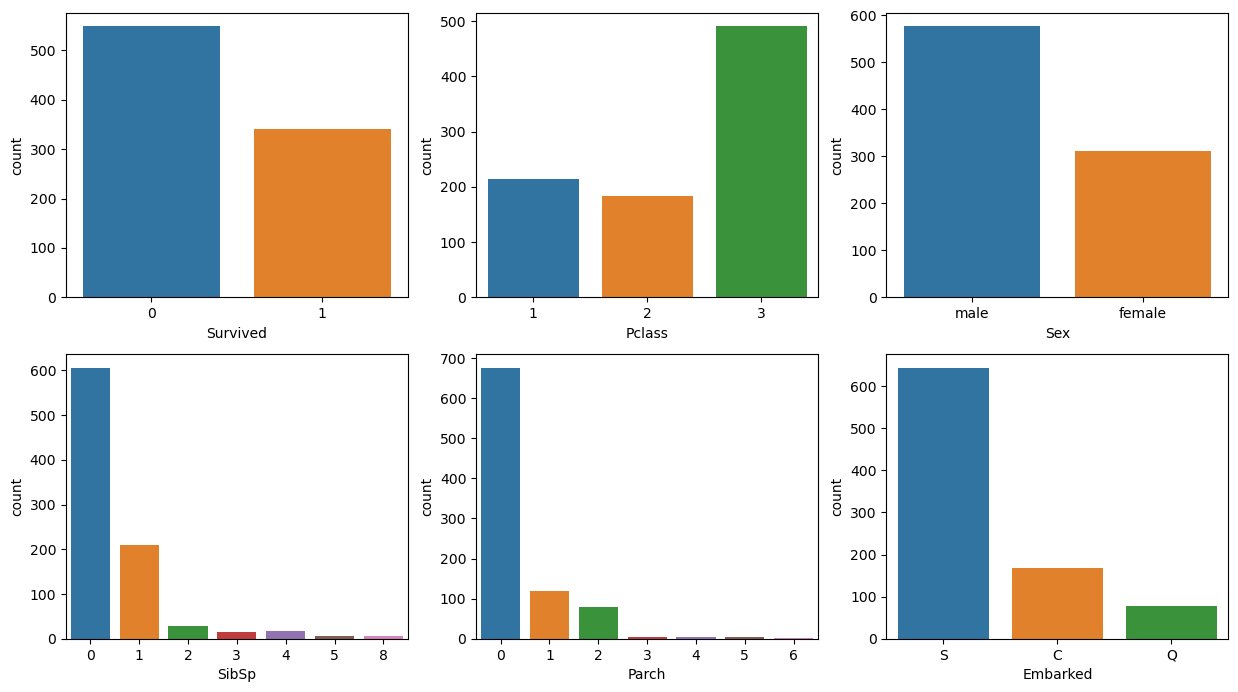

In [12]:
# Count Plot of Cagerorical Data's

pt.figure(figsize = (15,17))
for category in enumerate(categories):
    pt.subplot(4,3, category[0] + 1)
    sns.countplot(x = category[1], data = df_train)
    

1. **More people died-549 (0) more than those that survived-340 (1)**
2. **The Pclass 3 is filled than the others; more people will always go for 3rd Class as it's cheaper**

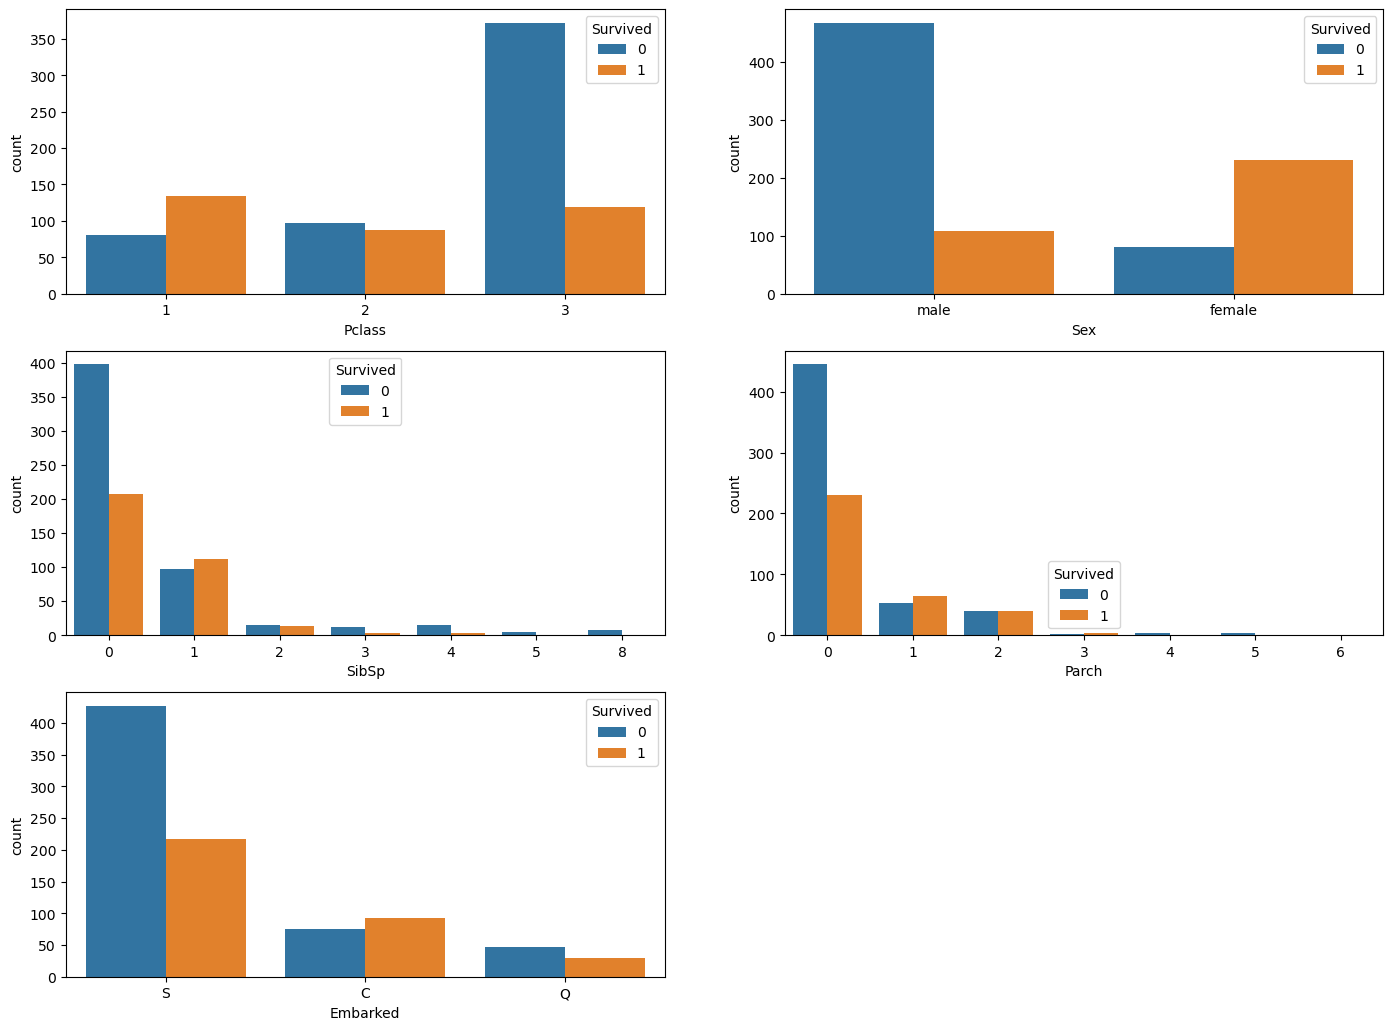

In [13]:
# Count Plot of Cagerorical Data's with respect to Survived

plot_categories = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
pt.figure(figsize = (17,17))
for category in enumerate(plot_categories):
    pt.subplot(4,2, category[0] + 1)
    sns.countplot(x = category[1],hue="Survived", data = df_train)

## Observation
1. More people in the Pclass 3 died than in the other Classes.
2. The Males died more in the Crisis.
3. The only persons in the Parch 4,5,6 died...

## Encoding Object type Categorical Datas -  Sex and Embark

In [14]:
def encode_categorical_data(data):
    data["Sex"] = data.Sex.map({"male":0, "female":1})
    data["Embarked"] = data.Embarked.map({"S": 0, "C": 1, "Q": 2})

In [15]:
encode_categorical_data(df_train)

In [16]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1


## Dropping less useful Columns

- **PassengerId** is not important as its just a Numbering.
- **Name** isn't much important too, as People won't get saved based on their Names.
- **Ticket** isn't an important feature too, as its an object type that differs in every row.

In [17]:
# Drop Columns
def drop_columns(columns):
    columns.drop(columns = ["PassengerId", "Name", "Ticket"], inplace=True)

In [18]:
drop_columns(df_train)

## Separating Features and Target

In [19]:
X_train = df_train.drop("Survived", axis = 1)
y_train = df_train.Survived

## Modelling

In [20]:
model = LogisticRegression()

In [21]:
# Training Logistic Regression
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation - Train Dataset

In [22]:
X_train_prediction = model.predict(X_train)

In [23]:
print("Accuracy Score - Train : ", accuracy_score(X_train_prediction, y_train), "\n")
print(classification_report(X_train_prediction, y_train))

Accuracy Score - Train :  0.8031496062992126 

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       576
           1       0.70      0.76      0.73       313

    accuracy                           0.80       889
   macro avg       0.78      0.79      0.79       889
weighted avg       0.81      0.80      0.80       889



## Test Dataset

In [83]:
# Load Dataset
df_test = pd.read_csv("Test and Train Datasets/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Kaggle Challenge

### Submission File Format:
- You should submit a csv file with exactly 418 entries plus a header row.
- Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

- The file should have exactly 2 columns:

- PassengerId (sorted in any order)
- Survived (contains your binary predictions: 1 for survived, 0 for deceased)

In [84]:
## Confirm Shape of df_test
df_test.shape

(418, 11)

In [85]:
## Null values information
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [86]:
# Save PassengerId column, then drop
Passenger = df_test[["PassengerId"]]
df_test.drop("PassengerId", axis = 1, inplace=True)

In [87]:
# Drop Name, Ticket and Cabin columns
df_test.drop(["Name","Ticket", "Cabin"], axis = 1, inplace=True)

In [88]:
# Fill missing Values in Fare with Mean value of the other vales
df_test["Fare"] = df_test["Fare"].fillna(df_test.Fare.mean())

# Fill missing Values in Age with Mean value of the other vales
df_test["Age"] = df_test["Age"].fillna(df_test.Age.mean())


In [89]:
# Convert Object type Categorical Data's to Numerical type
encode_categorical_data(df_test)

### Making Predictions

In [93]:
Survived = model.predict(df_test)

In [94]:
Passenger["Survived"] = Survived

C:\Users\Craennie\AppData\Local\Temp\ipykernel_5664\910833647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Passenger["Survived"] = Survived


In [95]:
Passenger

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [102]:
## Save as CSV file
Passenger.to_csv("Survival Prediction.csv", index=False)

### Accuracy Score on Test Dataset - 76.555%